**Goal:** Identify the major factors causing 30-day readmissions in diabetic patients.

**Why:** High readmission rates are linked to increased hospital costs and financial penalties, so it's essential to discover and address the drivets. Reducing 30-day readmissions improves patient care and lowers healthcare costs.

**Context:** While the focus is on 30-day readmissions, exploring >30 day and no readmssions provide additional context about long term care outcomes and overall patient recovery.

# Diabetes Data Analysis: Understanding What Drives 30-Day Patient Readmissions

Readmissions are a significant factor driving healthcare costs and showing how well hospitals care for patients. High 30-day readmission rates can lead to increased healthcare costs and reduced patient satisfaction, as hospitals are often penalised for having too many discharged patients readmitted within 30 days.

This project looks into a healthcare dataset to find the key reasons why patients are readmitted to hospitals, with a focus on 30-day readmissions. The goal is to analyse patient demographics, hospital admission details, medication use, treatment outcomes, repeat visits, and generate meaningful insights that can help reduce healthcare costs, improve patient care and support better hospital decision-making.

In addition to 30-day readmissions, this study also explores >30 day and no readmissions to give a broader understanding of long-term patient outcomes and the patterns of recovery. Understanding >30-day and no readmissions also provides valuable insights into overall hospital performance and strain on hospital resources.

This analysis will also provide targeted recommendations to help reduce future 30-day readmissions and improve patient outcomes.

## Data Collection

The dataset contains healthcare records of diabetic patients, including patient demographics (age, gender, race), hospital admission details (admission type, discharge details, time in hospital), medical history (diagnoses and number of prior visits), and medication use (insulin, metformin, and other diabetes medications). This data will be used to explore patterns and identify the key factors causing or influencing patient readmissions. The dataset is sourced from the UCI Machine Learning Repository and includes records from 130 US hospitals between 1999 and 2008.

In [4]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading dataset of diabetic patient records from 130 US hospitals (1999-2008)
diabetic_df = pd.read_csv('diabetic_data.csv', header = 0, encoding='utf-8')

### Initial Data Exploration

Checking the structure of the data to understand its shape, content, and potential issues.

In [7]:
# View the column names to understand the structure of the dataset
diabetic_df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [8]:
# Display the first five rows of the DataFrame
diabetic_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [9]:
# Display the last five rows of the DataFrame
diabetic_df.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [10]:
# Check the number of rows and columns in the dataset
diabetic_df.shape

(101766, 50)

In [11]:
# Check the general information about the dataset (data types, non-null values)
diabetic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [12]:
# Display 10 random rows to check data consistency and variability
diabetic_df.sample(n=10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
32311,103078800,18461538,?,Female,[90-100),?,2,1,6,6,...,No,Steady,No,No,No,No,No,No,Yes,NO
69940,199714938,86479470,Caucasian,Male,[60-70),?,3,6,1,5,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
79420,243732006,41620392,Caucasian,Male,[70-80),?,3,1,1,4,...,No,No,No,No,No,No,No,No,No,NO
67885,190958184,40422150,Caucasian,Male,[60-70),?,1,1,7,2,...,No,Down,No,No,No,No,No,Ch,Yes,<30
9499,41367258,81666297,Caucasian,Female,[40-50),?,1,1,7,2,...,No,Down,No,No,No,No,No,Ch,Yes,<30
53349,156597894,95592708,Caucasian,Female,[60-70),?,5,3,1,3,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
79999,246060570,73175661,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Steady,No,No,No,No,No,No,Yes,>30
98654,403730606,49948542,Caucasian,Male,[70-80),?,1,1,1,2,...,No,No,No,No,No,No,No,No,No,>30
70483,202307976,51291468,Caucasian,Male,[50-60),?,1,3,7,7,...,No,Steady,No,No,No,No,No,No,Yes,NO
53609,157113438,65786310,AfricanAmerican,Male,[80-90),?,1,1,1,2,...,No,Steady,No,No,No,No,No,No,Yes,>30


## Descriptive Statistics

This section provides a quick statistical summary to understand the central tendency and variability of the data.

In [14]:
# Get a quick statistical summary of the DataFrame
diabetic_df.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


## Data Cleaning

This step is done to handle missing values, correct errors, and prepare the data for analysis.

In [16]:
# Check data types of the DataFrame
diabetic_df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [17]:
# Sort patient records chronologically to group visits for the same patient
# Sorting by encounter_id for each patient ensures that their visits are listed in the right order
diabetic_df1 = diabetic_df.sort_values(by=['patient_nbr', 'encounter_id']).copy()

# Create a flag for repeat visits (1 = repeat visit, 0 = first visit)
# Helps identify if repeat visits are linked to higher readmission rates
diabetic_df1['repeat_visit'] = diabetic_df1.duplicated(subset='patient_nbr').astype(int)

# Reset index to clean up the DataFrame after sorting
diabetic_df1 = diabetic_df1.reset_index(drop=True)

A repeat_visit flag was created to track multiple admissions for the same patient, which will help identify patterns in repeated readmissions.

In [19]:
# Check for missing values in each column of the dataset
diabetic_df1.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [20]:
# Replace all missing values in 'max_glu_serum' and 'A1Cresult' with 'No Test'
diabetic_df1['max_glu_serum'] = diabetic_df1['max_glu_serum'].fillna('No Test')
diabetic_df1['A1Cresult'] = diabetic_df1['A1Cresult'].fillna('No Test')

In [21]:
# Replace all occurences of '?' with 'NaN'
diabetic_df1.replace('?', np.nan, inplace=True)

In [22]:
# Check for missing values again
diabetic_df1.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [23]:
# Identify the most frequent race in the 'race' column, i.e. the mode
most_frequent_race = diabetic_df1['race'].value_counts().idxmax()

# Fill the missing values in the 'race' column with the most frequent race
diabetic_df1['race'] = diabetic_df1['race'].fillna(most_frequent_race)

In [24]:
# Drop 'weight' due to a high proportion of missing values making it unreliable for analysis
diabetic_df1.drop(columns=['weight'], inplace=True)

# Drop 'payer_code' as it is not relevant for this analysis and it contains lots of missing values
diabetic_df1.drop(columns=['payer_code'], inplace=True)

In [25]:
# Fill missing values in 'medical_specialty' with 'Missing'
diabetic_df1['medical_specialty'] = diabetic_df1['medical_specialty'].fillna('Missing')

In [26]:
# Fill missing values in diagnosis columns with 'Unknown'
diabetic_df1['diag_1'] = diabetic_df1['diag_1'].fillna('Unknown')
diabetic_df1['diag_2'] = diabetic_df1['diag_2'].fillna('Unknown')
diabetic_df1['diag_3'] = diabetic_df1['diag_3'].fillna('Unknown')

In [27]:
# Clean the 'age' column by removing brackets and converting to categorical
diabetic_df1['age'] = diabetic_df1['age'].str.replace('[', '').str.replace(')', '')

# Check if the changes have taken effect
diabetic_df1['age'].unique()

array(['50-60', '80-90', '30-40', '60-70', '40-50', '70-80', '10-20',
       '90-100', '20-30', '0-10'], dtype=object)

### Identifying and Dropping Medication Columns with One Unique Value

After handling missing values, we now check the medication columns for unique values. Any column with only one unique value provides no analytical value and will be removed to keep the dataset cleaner.

In [29]:
# Create a list of all the medication columns
medication_columns = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
    'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
    'glipizide-metformin', 'glimepiride-pioglitazone',
    'metformin-rosiglitazone', 'metformin-pioglitazone'
]

# Check the number of unique values in each medication column
unique_values = diabetic_df1[medication_columns].nunique()
# Identify columns with one unique value
print(unique_values[unique_values == 1])

examide        1
citoglipton    1
dtype: int64


In [30]:
# Drop medication columns with only one unique value since they have no analytical value
diabetic_df1.drop(columns=['examide', 'citoglipton'], inplace=True)

### Removing patients who died or are in hospice care
Patients who were discharged to hospice or marked as deceased are not technically "successful discharges", so including them could introduce bias and affect readmission and discharge outcomes. Removing them ensures that "NO readmission" reflects actual patient recovery.

In [32]:
# Define death and hospice IDs
death_ids = [11, 13, 14, 19, 20, 21]

In [33]:
# Create a separate dataframe for death and hospice cases
death_cases = diabetic_df1[diabetic_df1['discharge_disposition_id'].isin(death_ids)]

In [34]:
# Remove the death & hospice cases from the main dataframe
diabetic_df1 = diabetic_df1[~diabetic_df1['discharge_disposition_id'].isin(death_ids)]

In [35]:
# Check if IDs were removed correctly
diabetic_df1['discharge_disposition_id'].value_counts()

discharge_disposition_id
1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
5      1184
25      989
4       815
7       623
23      412
28      139
8       108
15       63
24       48
9        21
17       14
16       11
10        6
27        5
12        3
Name: count, dtype: int64

In [36]:
# Check the counts of death & hospice care cases
death_cases['discharge_disposition_id'].value_counts()

discharge_disposition_id
11    1642
13     399
14     372
19       8
20       2
Name: count, dtype: int64

✅ **Insights:**
- *Around 2,423 patients (approximately 2.4% of the dataset) were confirmed to have died or been placed in hospice care, and this impacts the interpretation of "successful discharges" - since death is not technically a positive outcome.*

In [38]:
# Check for remaining missing values
diabetic_df1.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose  

In [39]:
# Check the shape of the cleaned DataFrame
diabetic_df1.shape

(99343, 47)

In [40]:
# Save the cleaned dataset to a CSV file for use in Tableau analysis
diabetic_df1.to_csv('cleaned_data_for_tableau.csv', index=False)
print('File Saved Successfully!')

File Saved Successfully!


## Exploratory Data Analysis (EDA)

The objective in this section is to explore the cleaned data to identify trends, patterns, correlations, and relationships between variables. This analysis helps in understanding the dataset better for more analysis and machine learning modeling.

## Patient Demographics
Understand the distribution of age, gender, and race in the dataset.

### Age Distribution

In [44]:
# Define function to plot distributions
def plot_distribution(data, column, title, xlabel, ylabel):
    plt.figure(figsize=(8, 5))
    try:
        sns.countplot(x=column, data=data, order=sorted(data[column].unique()))
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()
    except Exception as e:
        print(f"Error plotting {column}: {e}")

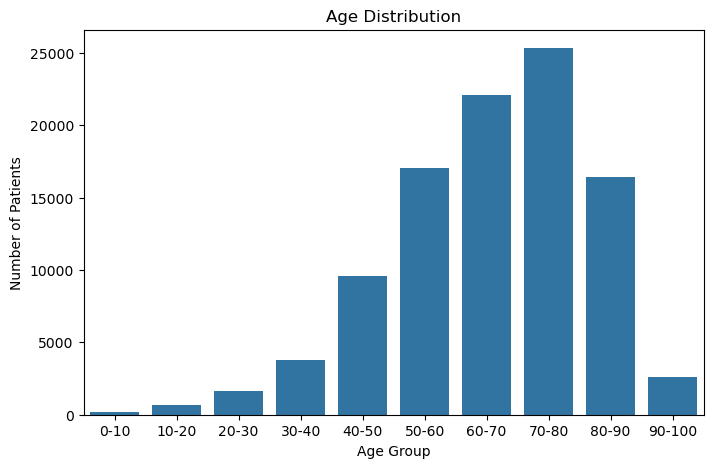

In [45]:
# Plot age distribution
plot_distribution(diabetic_df1, 'age', 'Age Distribution', 'Age Group', 'Number of Patients')

✅ **Insights:** *Most patients are between 60 and 80 years old, which means a large part of the hospital's diabetic patients are older adults*

### Gender Distribution

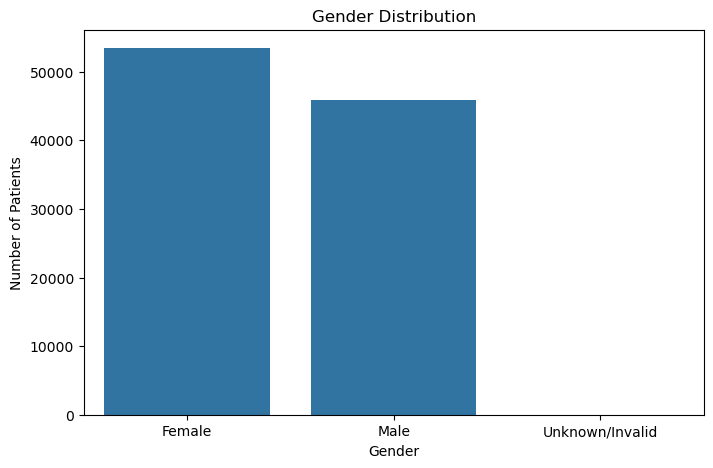

In [48]:
# Plot gender distribution
plot_distribution(diabetic_df1, 'gender', 'Gender Distribution', 'Gender', 'Number of Patients')

✅ **Insights:** *Most patients are females, but the gap between male and female patients isn’t large enough to suggest a major gender-related pattern. The "Unknown/Invalid" category might be due to missing or incorrect data.*

### Race Distribution

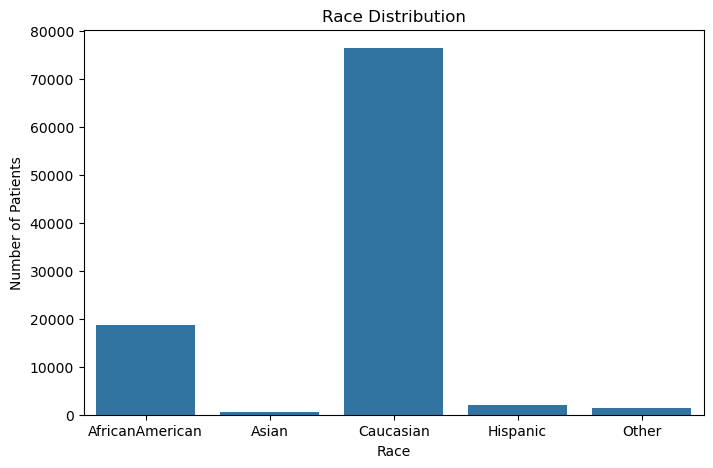

In [51]:
# Plot race distribution
plot_distribution(diabetic_df1, 'race', 'Race Distribution', 'Race', 'Number of Patients')

✅ **Insights:** *Most patients are Caucasian, followed by African American patients. The smaller number of other racial groups could be because fewer people from those groups live in the area or face barriers to accessing healthcare.*

## Hospital Stay and Medical Procedures
Understand the distribution of length of hospital stay and medical procedures in the dataset.

### Time in Hospital

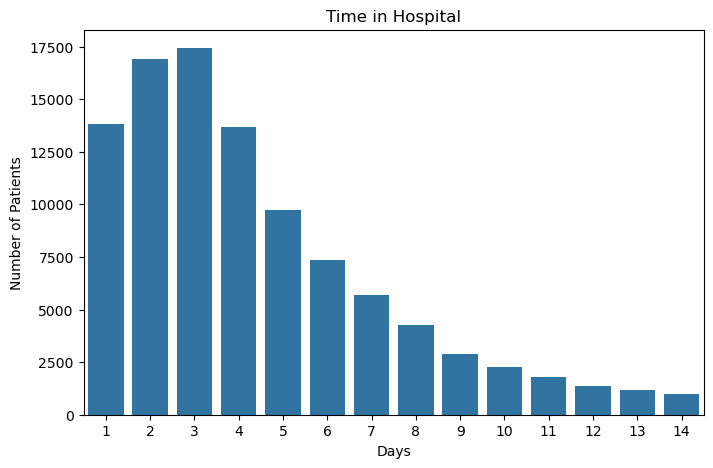

In [55]:
# Plot time in hospital distribution
plot_distribution(diabetic_df1, 'time_in_hospital', 'Time in Hospital', 'Days', 'Number of Patients')

✅ **Insights:** 
- *Most patients stayed in the hospital for 1 to 4 days, with 2-day and 3-day stays being the most common, suggesting that most admissions are short-term, manageable conditions.*
- *Stays longer than 10 days are rare, which could mean that complex cases are uncommon or that the hospital is trying to avoid long stays by using alternative care strategies.*

### Number of Lab Procedures

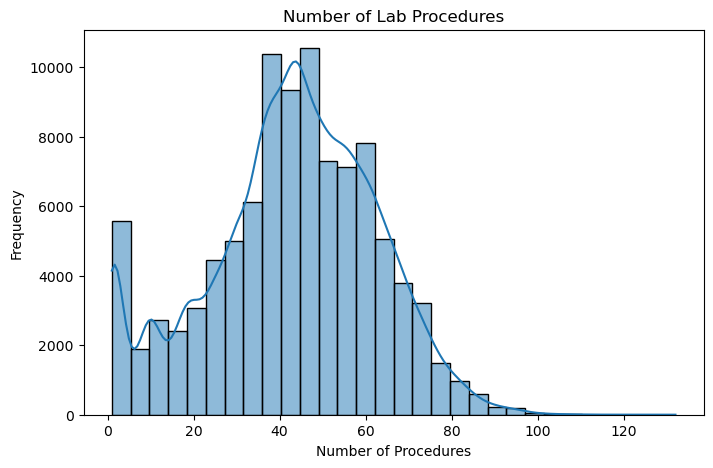

In [58]:
# Define a function to plot histograms
def plot_histogram(data, column, title, xlabel, ylabel, bins=30):
    plt.figure(figsize=(8, 5))
    try:
        sns.histplot(data[column], bins=bins, kde=True)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()
    except Exception as e:
        print(f"Error plotting {column}: {e}")

# Plot number of lab procedures
plot_histogram(diabetic_df1, 'num_lab_procedures', 'Number of Lab Procedures', 'Number of Procedures', 'Frequency')

✅ **Insights:** *The number of lab procedures has a skewed distribution. Most patients had 40 to 50 lab tests, but some had a lot more. This suggests that testing is fairly standard, but more tests might be needed for complicated cases or due to differences in hospital practices.*

### Number of Medications

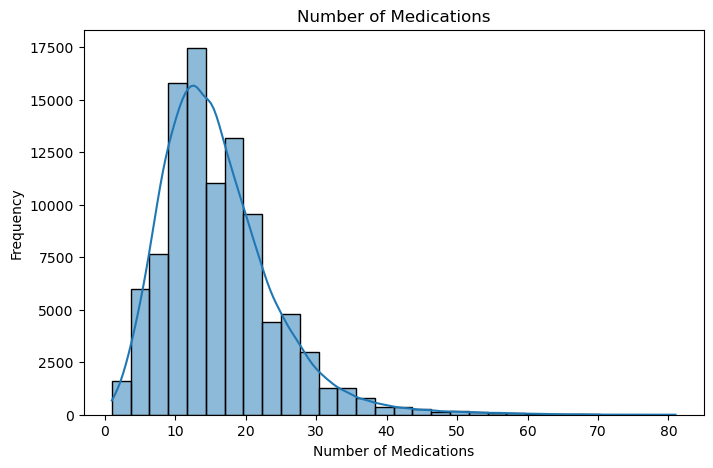

In [61]:
# Plot number of medications
plot_histogram(diabetic_df1, 'num_medications', 'Number of Medications', 'Number of Medications', 'Frequency')

✅ **Insights:** 
- *Most patients were prescribed 10–15 medications during their hospital stay, with the highest frequency around 12 medications.*
- *A few patients are on more than 40 medications, which could mean they have serious health problems or are dealing with polypharmacy issues.*
- *Since the distribution is skewed to the right, most patients get a moderate number of medications, but some need a lot more due to complex health issues or more intensive treatment plans.*

### Number of Diagnoses

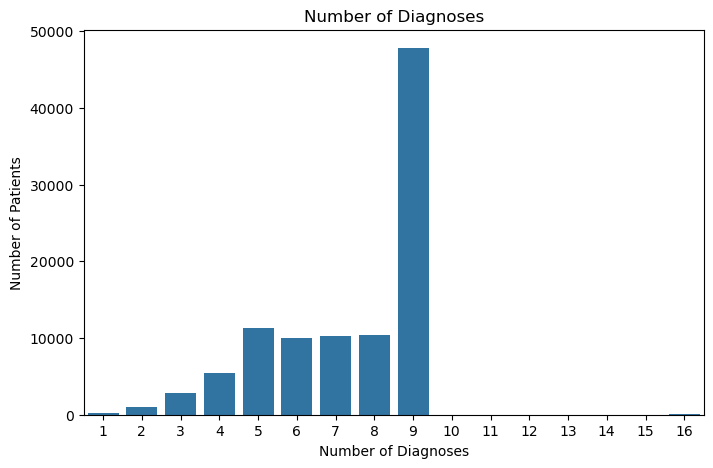

In [64]:
# Plot number of diagnoses
plot_distribution(diabetic_df1, 'number_diagnoses', 'Number of Diagnoses', 'Number of Diagnoses', 'Number of Patients')

✅ **Insights:** *Most patients had 9 diagnoses, which is significantly higher than other values. This suggests that many diabetic patients have other health issues like high blood pressure or kidney problems. So, they may need more coordinated care*

## Univariate & Bivariate Analysis (Finding Relationships)

## Readmitted vs Non-Readmitted

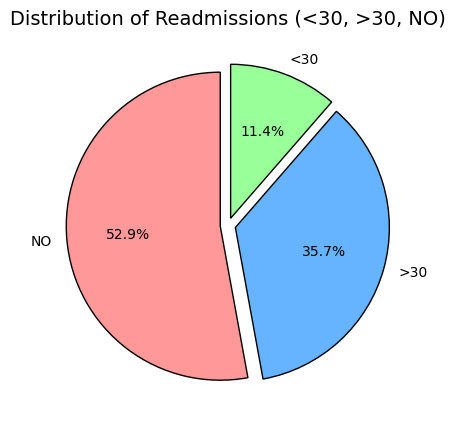

In [68]:
plt.figure(figsize=(8, 5))

# Get value counts for each readmission category
diabetic_df1['readmitted'].value_counts().plot(kind='pie', 
                                                autopct='%.1f%%', 
                                                startangle=90, 
                                                colors=['#ff9999','#66b3ff','#99ff99'], 
                                                wedgeprops={'edgecolor': 'black'},
                                                explode=(0.05, 0.05, 0.05)) 

plt.title('Distribution of Readmissions (<30, >30, NO)', fontsize=14)
plt.ylabel('')  # Remove y-axis label so that the look is cleaner
plt.show()

### Readmission by Age Group

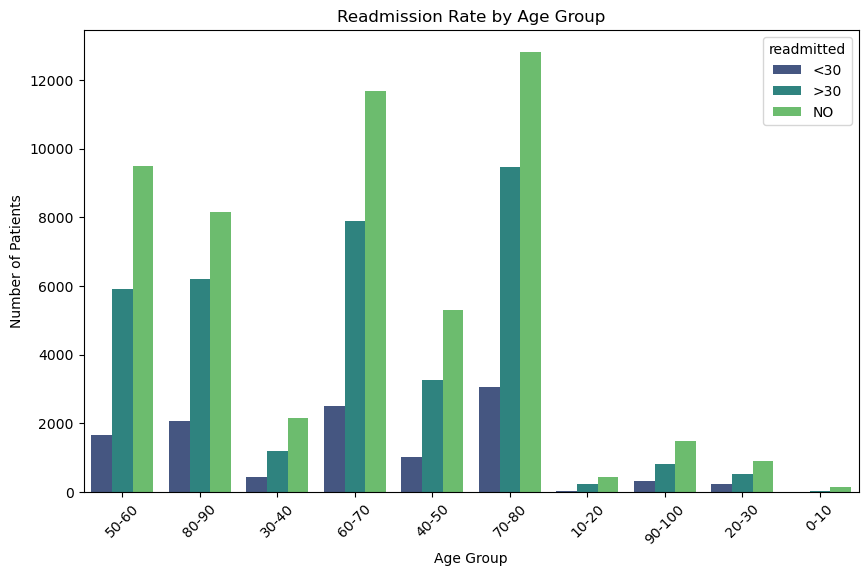

In [70]:
# Define function to plot count plots
def plot_count(data, x, hue, title, xlabel, ylabel, color=None):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=x, hue=hue, data=data, palette=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.show()

# Checking if age influences readmission patterns.
plot_count(diabetic_df1, 
           x='age', 
           hue='readmitted', 
           title='Readmission Rate by Age Group', 
           xlabel='Age Group', 
           ylabel='Number of Patients', 
           color='viridis')

✅ **Insights:** 
- *Most readmissions (both within 30 days and after 30 days) happen in the 60–70 and 70–80 age groups, showing that older patients are more likely to have problems after discharge and be readmitted.*
- *The 30–40 and 40–50 age groups have fewer readmissions, which suggests that younger patients are recovering better.*
- *Most patients are not readmitted ("NO"), which means that discharge and treatment plans are working well for most age groups.*

### Readmission by Gender

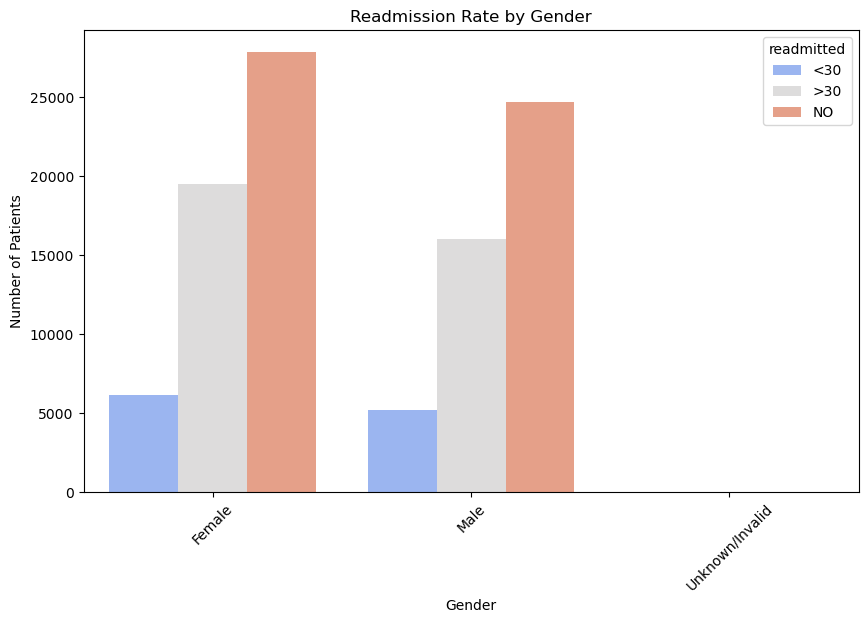

In [73]:
# Analyzing if gender influences readmission likelihood.
plot_count(diabetic_df1, 
           x='gender', 
           hue='readmitted', 
           title='Readmission Rate by Gender', 
           xlabel='Gender', 
           ylabel='Number of Patients', 
           color='coolwarm')

✅ **Insights:** 
- *The number of patients who were not readmitted ("NO") is higher than those readmitted across both genders.*
- *Female patients are slightly more likely to be readmitted within 30 days and after 30 days than male patients.*

### Readmission by Race

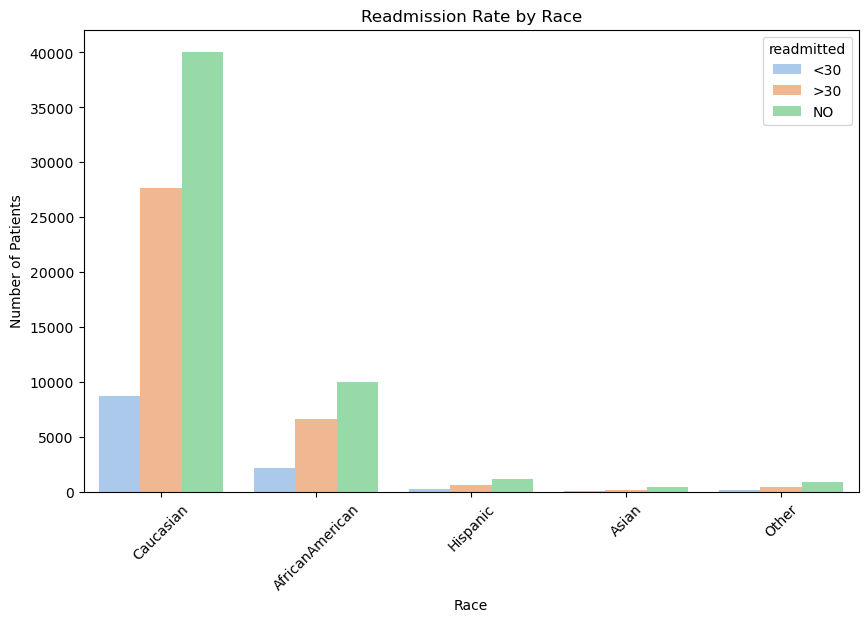

In [76]:
# Checking if race influences readmission patterns.
plot_count(diabetic_df1, 
           x='race', 
           hue='readmitted', 
           title='Readmission Rate by Race', 
           xlabel='Race', 
           ylabel='Number of Patients', 
           color='pastel')

✅ **Insights:** 
- *Most readmissions are among Caucasian and African American patients, with Caucasian patients having the highest numbers in all groups.*
- *Hispanic, Asian, and Other groups have fewer readmissions, which could be due to these races being underepresented in the area/country or how care is provided.*

### Time in Hospital vs. Readmission

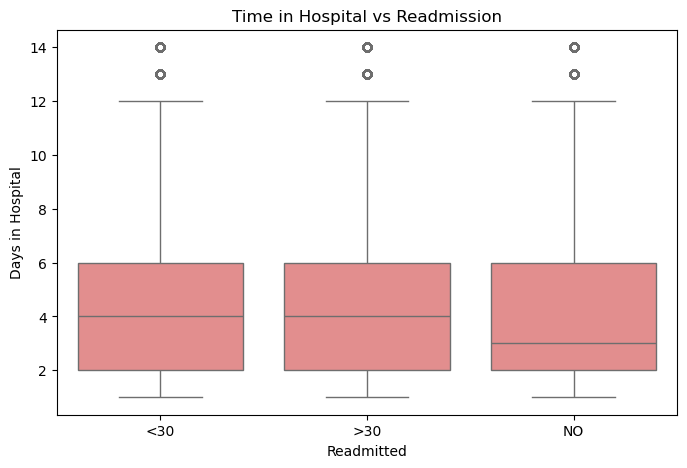

In [79]:
# Define function to create a box plot
def plot_box(data, x, y, title, xlabel, ylabel, color='lightblue'):
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=x, y=y, data=data, color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Plot time in hospital vs readmission
plot_box(diabetic_df1, 
         x='readmitted', 
         y='time_in_hospital', 
         title='Time in Hospital vs Readmission', 
         xlabel='Readmitted', 
         ylabel='Days in Hospital', 
         color='lightcoral')

✅ **Insights:** *Patients readmitted within 30 days or after 30 days tend to stay in the hospital for around 4–5 days, while those not readmitted typically have shorter stays of around 3 days.*

### Number of Medications vs. Readmission

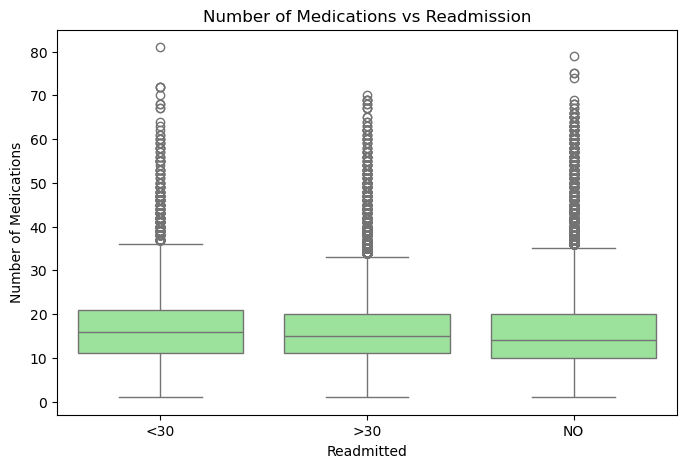

In [82]:
# Plot number of medications vs readmission
plot_box(diabetic_df1, 
         x='readmitted', 
         y='num_medications', 
         title='Number of Medications vs Readmission', 
         xlabel='Readmitted', 
         ylabel='Number of Medications', 
         color='lightgreen')

✅ **Insights:** 
- *Patients, whether readmitted or not, were usually prescribed around 15 medications.*
- *However, there are notable outliers, with some patients receiving over 40 medications. This suggests that medication count alone may not strongly differentiate between patients who are readmitted and those who are not.*

### Number of Diagnoses vs. Readmission

C:\Users\victo\AppData\Local\Temp\ipykernel_18052\13192005.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=x, y=y, data=data, inner='box', palette='muted')


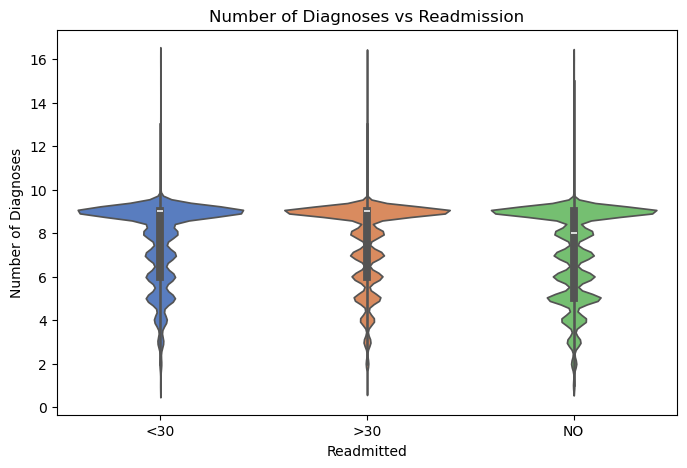

In [85]:
# Define a function to create a violin plot
def plot_violin(data, x, y, title, xlabel, ylabel):
    plt.figure(figsize=(8, 5))
    sns.violinplot(x=x, y=y, data=data, inner='box', palette='muted')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

# Plot number of diagnoses vs readmission
plot_violin(diabetic_df1, 
            x='readmitted', 
            y='number_diagnoses', 
            title='Number of Diagnoses vs Readmission', 
            xlabel='Readmitted', 
            ylabel='Number of Diagnoses')

✅ **Insights:** 
- *Patients readmitted within 30 days and after 30 days had around 9 diagnoses on average, while those not readmitted had slightly fewer (about 8) — suggesting that patients with fewer health issues (diagnoses) might recover better after discharge.*
- *The disribution is similar across all groups, which means that having more diagnoses doesn’t necessarily lead to more readmissions — other factors like medication use or discharge planning might play a bigger role.*

### Repeat Visits vs Readmission

<Figure size 1000x600 with 0 Axes>

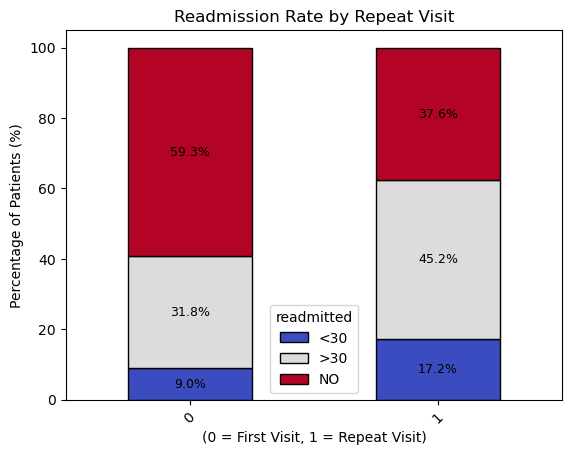

In [88]:
# A function to plot a stacked bar chart with ungrouped data
def plot_stacked_bar(data, x, hue, title, xlabel, ylabel, color_palette=None):
    plt.figure(figsize=(10, 6))
    
    # Normalize values to get proportions
    data_group = data.groupby([x, hue]).size().unstack().fillna(0)
    data_prop = data_group.div(data_group.sum(axis=1), axis=0) * 100
    
    # Plot stacked bar chart
    data_prop.plot(kind='bar', stacked=True, colormap=color_palette, edgecolor='black')

    # Annotate data values on the bars
    for n, x_value in enumerate(data_prop.index):
        cumulative_sum = 0
        for i, value in enumerate(data_prop.loc[x_value]):
            if value > 0:
                cumulative_sum += value
                plt.text(n, cumulative_sum - (value / 2), f'{value:.1f}%', 
                         ha='center', va='center', fontsize=9)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.legend(title=hue)
    plt.show()

# Plot repeat visits vs readmission
plot_stacked_bar(diabetic_df1,
                 x='repeat_visit',
                 hue='readmitted',
                 title='Readmission Rate by Repeat Visit',
                 xlabel='(0 = First Visit, 1 = Repeat Visit)',
                 ylabel='Percentage of Patients (%)',
                 color_palette='coolwarm')

✅ **Insights:** 
- *First-time patients are more likely to be discharged successfully with no readmissions (59.3%), which shows that initial care is generally effective at preventing complications*
- *Repeat patients are nearly twice as likely to be readmitted within 30 days (17.2% vs 9.0%), which could mean they have ongoing health problems or gap in care.*
- *More repeat patients are readmitted after 30 days (45.2% vs 31.8%), so better long-term care could help reduce strain on the hospital and improve recovery.*

### Discharge Disposition vs Readmission

<Figure size 1200x600 with 0 Axes>

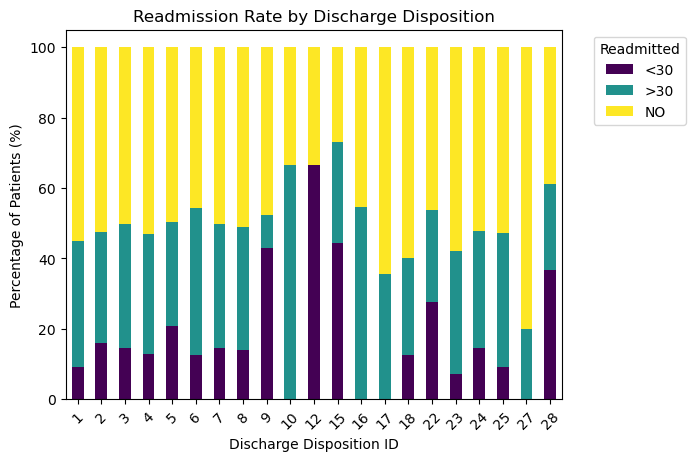

In [91]:
# Prepare and normalise data for discharge disposition
discharge_readmission = diabetic_df1.groupby('discharge_disposition_id')['readmitted'].value_counts(normalize=True).unstack() * 100

# Plot bar plot for discharge disposition
plt.figure(figsize=(12, 6))
discharge_readmission.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Readmission Rate by Discharge Disposition')
plt.xlabel('Discharge Disposition ID')
plt.ylabel('Percentage of Patients (%)')
plt.xticks(rotation=45)
plt.legend(title='Readmitted', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

✅ **Insights:**
- *Patients discharged to federal health care facilities (ID 27) have the highest successful discharge rate (~80% NO readmission). This suggests  that patients discharged to federal care facilities are more likely to receive adequate follow-up care or long-term management, reducing the need for readmission*
- *Patients classified as still patients (ID 12) have the highest short-term readmission rate (~65%), indicating patients under this category may have unresolved health issues, calling a need for better outpatient care.*
- *Patients discharged to long-term care hospitals (ID 23) have low short-term readmissions (~ 5%) and higher NO readmission rates (~ 60%), suggesting that long-term care facilities are managing ongoing health issues and reducing the need for immediate hospital returns.*
- *Patients discharged to home (ID 1) have moderate outcomes (~57% NO readmission and 7% returning within 30 days), indicating that home discharges are effective but could benefit from improved follow-up care.*

### Correlation Between Key Variables

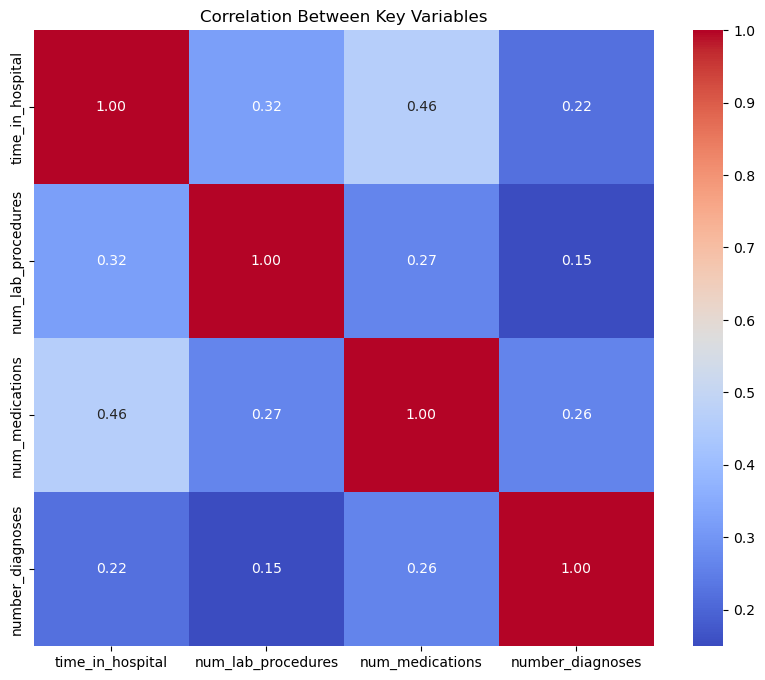

In [94]:
# Plot a heatmap to visualise correlation between numerical variables to identify relationships
plt.figure(figsize=(10, 8))
sns.heatmap(diabetic_df1[['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_diagnoses']].corr(), 
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Key Variables')
plt.show()

✅ **Insights:**
- *Time in hospital and number of medications have a moderate positive correlation (0.46), meaning longer hospital stays are linked to more medications.*
- *Number of diagnoses has a low correlation with other variables, suggesting it doesn't strongly impact hospital stay or medication use.*
- *Lab procedures show weak correlations with other variables, indicating they don’t have a strong influence on readmissions or hospital stay.*
- *Overall, this suggests that readmissions are likely caused by a mix of different factors working together.*

## Medication Outcomes & Changes

### Insulin Use and Readmission

Analyzing how insulin, metformin, and other diabetes medications influence readmission rates.  
**Goal:** Inform better medication management strategies.

<Figure size 1000x600 with 0 Axes>

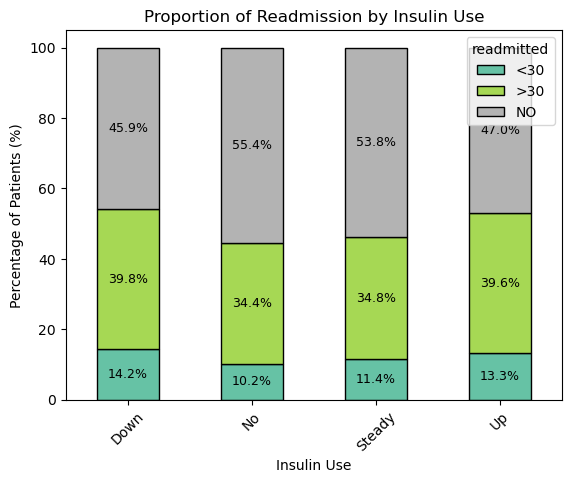

In [98]:
# Plot a stacked bar chart of readmission by insulin use
plot_stacked_bar(diabetic_df1,
                 x='insulin',
                 hue='readmitted',
                 title='Proportion of Readmission by Insulin Use',
                 xlabel='Insulin Use',
                 ylabel='Percentage of Patients (%)',
                 color_palette='Set2')

✅ **Insights:**
- *Patients not on insulin had the highest successful discharge rate (55.4%) and the lowest 30-day readmission rate (10.2%), suggesting that insulin use may not be necessary for all patients and could even be contributing to higher long-term readmission rates.*
- *Increasing or decreasing insulin use led to higher 30-day readmissions (~13%–14%) and higher long-term readmissions (~39%), which suggests that insulin adjustments might not be effectively managing long-term stability.*
- *Steady insulin use had slightly better discharge outcomes (53.8%) than adjusted doses, suggesting that sticking to a stable insulin plan might work better*

### Metformin Use and Readmission

<Figure size 1000x600 with 0 Axes>

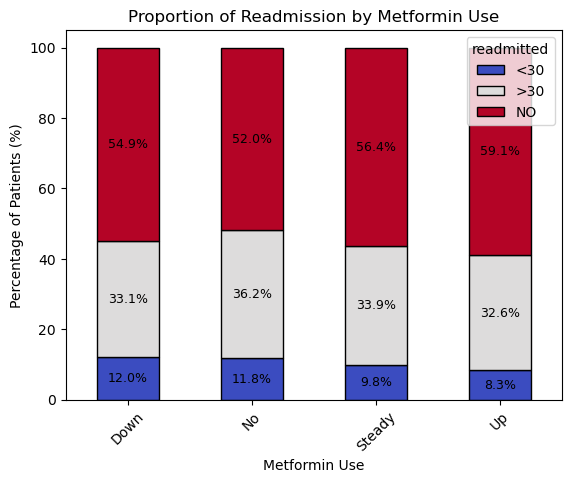

In [101]:
# Plot a stacked bar chart of readmission by metformin use
plot_stacked_bar(diabetic_df1,
                 x='metformin',
                 hue='readmitted',
                 title='Proportion of Readmission by Metformin Use',
                 xlabel='Metformin Use',
                 ylabel='Percentage of Patients (%)',
                 color_palette='coolwarm')

✅ **Insights:** 
- *Increased metformin use resulted in the highest successful discharge rate (59.1%) and the lowest short-term readmission rate (8.3%), suggesting that increasing the dose could improve both short-term and long-term outcomes*
- *Steady metformin use also showed a high discharge success rate (56.4%) but a slightly higher short-term readmission rate (9.8%). This indicates that consistent use helps with long-term recovery but may not prevent early complications as well as increased use.*
- *Patients not on metformin had higher 30-day readmission rates (11.8%) and lower discharge success (56.4%), reinforcing that metformin helps improve patient recovery*

### Glyburide Use and Readmission

<Figure size 1000x600 with 0 Axes>

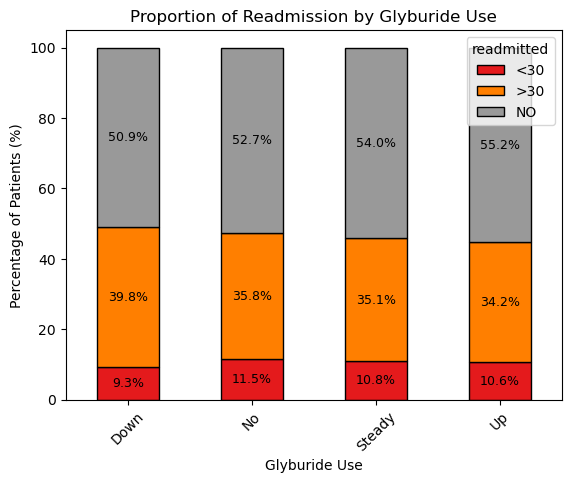

In [104]:
# Plot a stacked bar chart of readmission by glyburide use
plot_stacked_bar(diabetic_df1,
                 x='glyburide',
                 hue='readmitted',
                 title='Proportion of Readmission by Glyburide Use',
                 xlabel='Glyburide Use',
                 ylabel='Percentage of Patients (%)',
                 color_palette='Set1')

✅ **Insights:**
- *Glyburide didn’t seem to really affect 30-day readmission rates (~9%–11%), but patients on steady or increased doses had higher successful discharge rates (54.0%–55.2%), suggesting that consistent use might help with long-term recovery.*
- *Patients not on glyburide had a lower successful discharge rate (52.7%), showing that glyburide may improve long-term stability*
- *Decreasing glyburide dosage resulted in the lowest successful discharge rate (50.9%), suggesting that reducing glyburide doses could harm long-term recovery.*

### Glipizide Use and Readmission

<Figure size 1000x600 with 0 Axes>

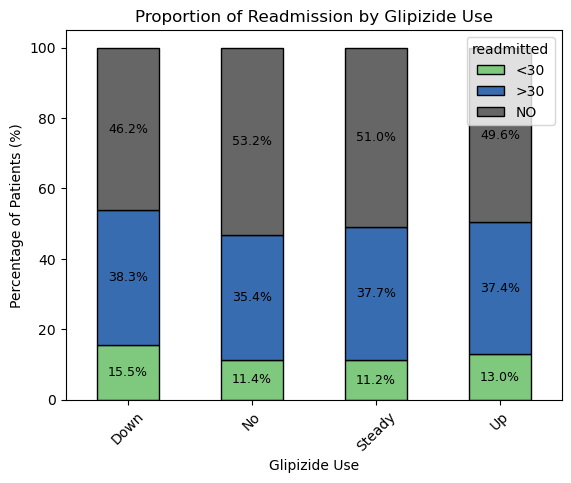

In [107]:
# Plot a stacked bar chart of readmission by glipizide use
plot_stacked_bar(diabetic_df1,
                 x='glipizide',
                 hue='readmitted',
                 title='Proportion of Readmission by Glipizide Use',
                 xlabel='Glipizide Use',
                 ylabel='Percentage of Patients (%)',
                 color_palette='Accent')

✅ **Insights:**
- *Increasing glipizide use was linked to slightly higher short-term readmissions (13%) and lower successful discharge rates (49.6%), suggesting that adjusting glipizide might make recovery less stable.*
- *Patients on steady glipizide had moderate results (~51% success rate, ~11% short-term readmissions), showing that consistent use may help with long-term stability more than changing the dose.*
- *Patients not on glipizide had the highest successful discharge rate (53.2%), indicating that glipizide might not be strongly effective in improving outcomes significantly.*

### Diabetes Medication Use and Readmission  

<Figure size 1000x600 with 0 Axes>

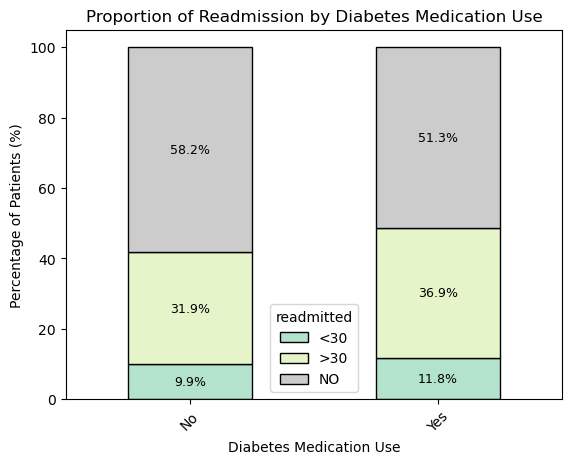

In [110]:
# Plot a stacked bar chart of diabetes medication and readmission
plot_stacked_bar(diabetic_df1,
                 x='diabetesMed',
                 hue='readmitted',
                 title='Proportion of Readmission by Diabetes Medication Use',
                 xlabel='Diabetes Medication Use',
                 ylabel='Percentage of Patients (%)',
                 color_palette='Pastel2')

✅ **Insights:**
- *Patients not on diabetes medication had the highest successful discharge rate (58.2%) and the lowest short-term readmission rate (9.9%), suggesting that medication alone might not be the main factor in reducing readmissions.*
- *Patients on diabetes medication had higher short-term (11.8%) and long-term (36.9%) readmission rates, indicating that medication management alone may not drive better outcomes post-discharge.*

### Combination Therapies
Checking if combining medications improves patient outcomes.  
**Goal:** Find the best therapy combinations to reduce 30-day readmissions.

### Insulin combinations

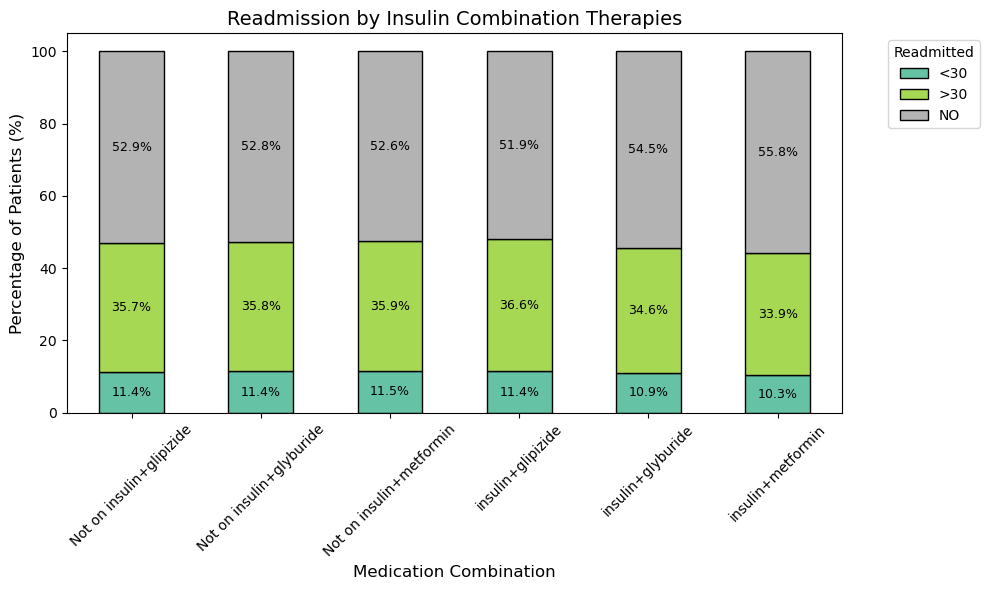

In [114]:
# Function to create combination therapy column
def create_combination(df, med1, med2):
    condition = (df[med1] != 'No') & (df[med2] != 'No')
    return condition.map({True: f"{med1}+{med2}", False: f"Not on {med1}+{med2}"})

# Function to plot stacked bar with percentages shown on the bars
def plot_stacked_combinations(df, combination, title, palette='viridis'):
    combo_counts = df.groupby([combination, 'readmitted']).size().unstack().fillna(0)
    combo_props = combo_counts.div(combo_counts.sum(axis=1), axis=0) * 100
    ax = combo_props.plot(kind='bar', stacked=True, colormap=palette, figsize=(10,6), edgecolor='black')

    # Annotate percentages
    for c in ax.containers:
        ax.bar_label(c, fmt='%.1f%%', label_type='center', fontsize=9)

    plt.title(title, fontsize=14)
    plt.ylabel('Percentage of Patients (%)', fontsize=12)
    plt.xlabel('Medication Combination', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Readmitted', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

# Create columns for insulin combination therapies
diabetic_df1['Insulin_Metformin'] = create_combination(diabetic_df1, 'insulin', 'metformin')
diabetic_df1['Insulin_Glyburide'] = create_combination(diabetic_df1, 'insulin', 'glyburide')
diabetic_df1['Insulin_Glipizide'] = create_combination(diabetic_df1, 'insulin', 'glipizide')

# Combine therapy combinations into a single DataFrame for easier visualization & reshape
insulin_combo_df = pd.concat([
    diabetic_df1[['Insulin_Metformin', 'readmitted']].rename(columns={'Insulin_Metformin':'Combo'}),
    diabetic_df1[['Insulin_Glyburide', 'readmitted']].rename(columns={'Insulin_Glyburide':'Combo'}),
    diabetic_df1[['Insulin_Glipizide', 'readmitted']].rename(columns={'Insulin_Glipizide':'Combo'})
])

# Plot readmission rates by insulin combination therapy
plot_stacked_combinations(insulin_combo_df, 
                          combination='Combo', 
                          title='Readmission by Insulin Combination Therapies',
                          palette='Set2')

✅ **Insights:**
- *Insulin + Metformin shows the best overall outcomes – Patients on Insulin + Metformin have the lowest 30-day readmission rate (10.3%) and the highest successful discharge rate (55.8%). This suggests that combining insulin with metformin may improve both short- and long-term recovery.*
- *Insulin + Glyburide also performs well, with a slightly better 30-day readmission rate (10.9%) and successful discharge rate (54.5%) compared to Insulin + Glipizide (51.9%). This shows that glyburide may work better than glipizide when combined with insulin.*
- *Combination therapies involving insulin slightly outperform individual insulin use. For example, Insulin + Metformin (10.3% <30, 55.8% NO) outperforms steady insulin alone (11.4% <30, 53.8% NO), suggesting that adding another medication to insulin could offer better post-discharge outcomes.*

### Metformin combinations

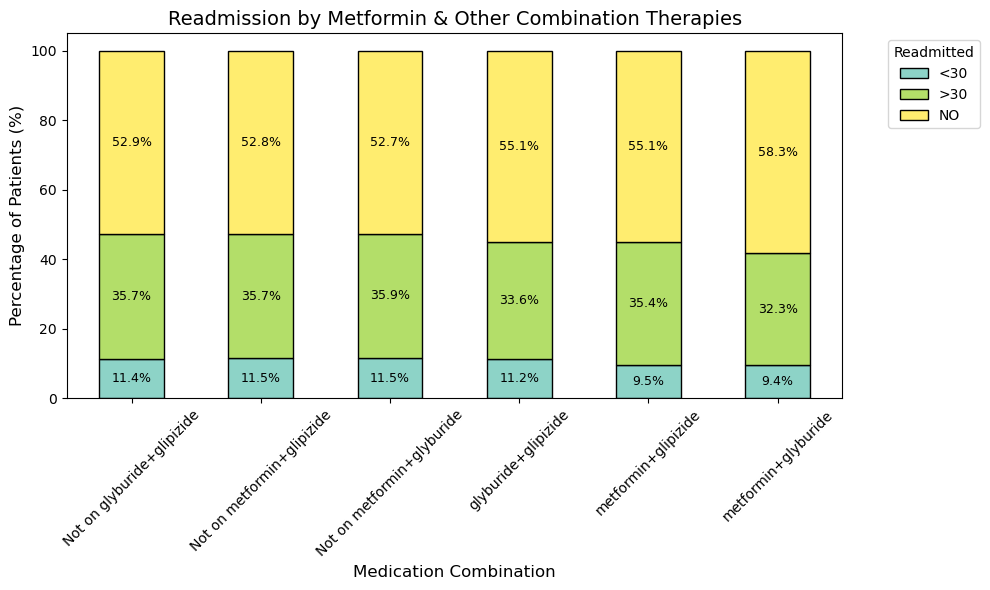

In [117]:
# Create columns for metformin combination therapies
diabetic_df1['Metformin_Glyburide'] = create_combination(diabetic_df1, 'metformin', 'glyburide')
diabetic_df1['Metformin_Glipizide'] = create_combination(diabetic_df1, 'metformin', 'glipizide')
diabetic_df1['Glyburide_Glipizide'] = create_combination(diabetic_df1, 'glyburide', 'glipizide')

# Combine therapy combinations into a single DataFrame for easier visualization & reshape
metformin_combo_df = pd.concat([
    diabetic_df1[['Metformin_Glyburide', 'readmitted']].rename(columns={'Metformin_Glyburide':'Combo'}),
    diabetic_df1[['Metformin_Glipizide', 'readmitted']].rename(columns={'Metformin_Glipizide':'Combo'}),
    diabetic_df1[['Glyburide_Glipizide', 'readmitted']].rename(columns={'Glyburide_Glipizide':'Combo'})
])

# Plot readmission rates by metformin combination therapy
plot_stacked_combinations(metformin_combo_df, 
                          combination='Combo', 
                          title='Readmission by Metformin & Other Combination Therapies',
                          palette='Set3')

✅ **Insights:**
- *Metformin + Glyburide offers the strongest overall outcomes – Patients on Metformin + Glyburide have the lowest short-term readmission rate (10.3%) and the highest successful discharge rate (55.8%). This shows that this combo may improve both short and long-term recovery*
- *Metformin + Glipizide also performs well, with a short-term readmission rate of 10.9% and a success rate of 54.5%, suggesting that glipizide works well when combined with metformin.*
- *Combination therapies with metformin outperform individual metformin use (except when dosage is upped) – Steady metformin use alone has a 9.8% 30-day readmission rate and 56.4% NO readmissions. However, the combination of metformin + glyburide provides better overall stability, balancing both lower short-term readmissions and higher successful discharges.*

## Diagnoses and Specialty Analysis

To identify which primary diagnoses and medical specialties are most associated with higher rates of readmission, especially within 30 days. This can help hospitals focus their resources and improve care in the most important areas. 

In [120]:
# Goal: Identify which medical diagnoses and specialties have the highest readmission rates.
# Focus: High-risk diagnoses and specialties to improve patient care.

### Top 10 Diagnoses Causing Readmissions
Find out the top 10 diagnoses linked to highest short-term (<30 days) readmission rates.

C:\Users\victo\AppData\Local\Temp\ipykernel_18052\3463124666.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.values, y=data.index, palette=color)


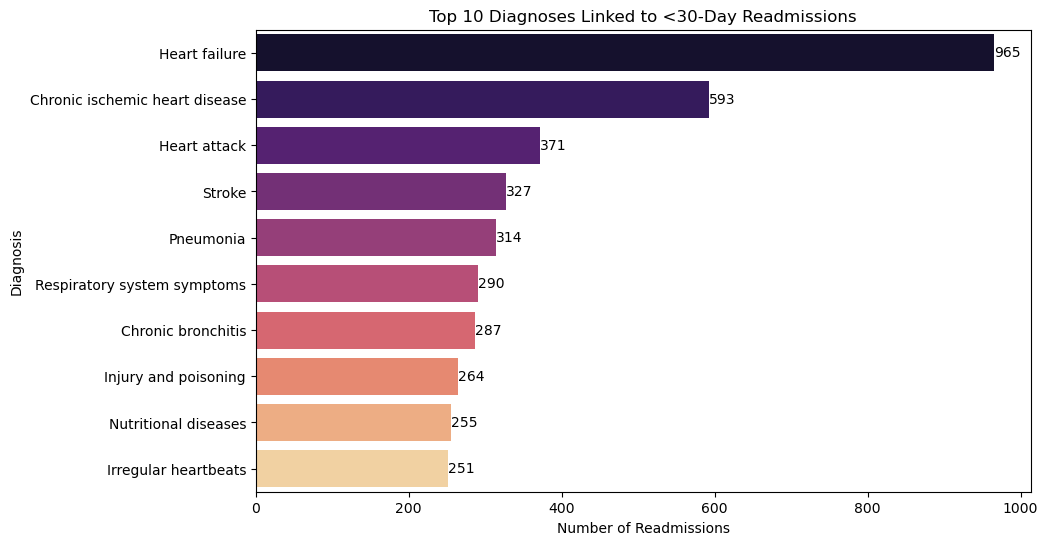

In [122]:
# Create a mapping dictionary for the ICD-9 codes
diagnosis_map = {
    '428': 'Heart failure',
    '414': 'Chronic ischemic heart disease',
    '410': 'Heart attack',
    '434': 'Stroke',
    '486': 'Pneumonia',
    '786': 'Respiratory system symptoms',
    '491': 'Chronic bronchitis',
    '996': 'Injury and poisoning',
    '276': 'Nutritional diseases',
    '427': 'Irregular heartbeats'
}

# Map the ICD-9 codes to their corresponding labels
top_diagnoses = diabetic_df1[diabetic_df1['readmitted'] == '<30']['diag_1'].value_counts().head(10)
top_diagnoses.index = top_diagnoses.index.map(diagnosis_map).fillna('Unknown')

# Define the function to plot the bar chart
def plot_top_diagnoses(data, title, xlabel, ylabel, color='magma'):
    plt.figure(figsize=(10, 6))

    # Draw a horizontal bar chart
    sns.barplot(x=data.values, y=data.index, palette=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Add data labels
    for index, value in enumerate(data.values):
        plt.text(value, index, f'{value}', color='black', va="center")
        
    plt.show()

# Plotting the Top 10 diagnoses linked to <30-Day readmissions
plot_top_diagnoses(top_diagnoses,
                   title='Top 10 Diagnoses Linked to <30-Day Readmissions',
                   xlabel='Number of Readmissions',
                   ylabel='Diagnosis',
                   color='magma')

✅ **Insights:**
- *Heart failure is the main cause of early readmissions - better care for heart failure patients after discharge could help reduce 30-days readmissions.*
- *Cardiovascular issues like heart failure, chronic heart disease, heart attack, and irregular heartbeats are major drivers of 30-day readmission.*
- *Respiratory issues like pneumonia and chronic bronchitis also contribute to high readmissions - better respiratory care after discharge could help.*
- *Stroke and injuries/poisoning are also key reasons for readmission in diabetic patients - better rehab and lifestyle support could improve recovery.*

### Medical Specialty Analysis
Identify the medical specialties with the highest short-term readmission rates.

<Figure size 1200x700 with 0 Axes>

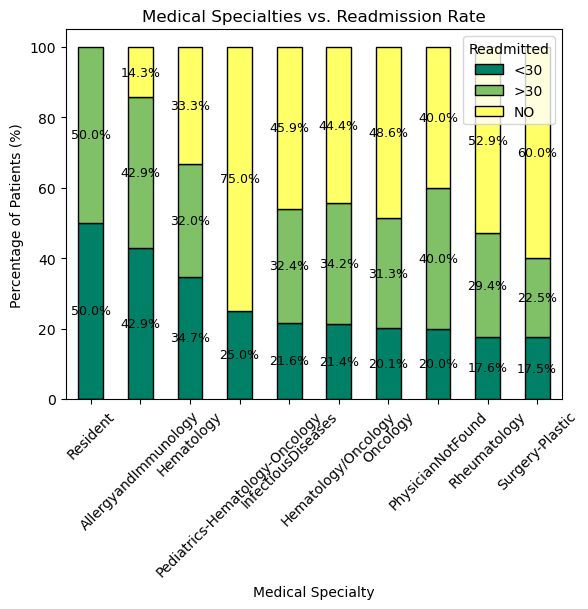

In [125]:
# A function to plot a stacked bar for a grouped and normalised dataframe
def plot_stacked_bar_grouped(data, title, xlabel, ylabel, color_palette='viridis', show_labels=True):
    plt.figure(figsize=(12, 7))
    
    # Plot stacked bar chart directly from data
    data.plot(kind='bar', stacked=True, colormap=color_palette, edgecolor='black')
    
    if show_labels:
        # Annotate data values on the bars (only if show_labels=True)
        for n, x_value in enumerate(data.index):
            cumulative_sum = 0
            for i, value in enumerate(data.loc[x_value]):
                if value > 0:
                    cumulative_sum += value
                    plt.text(n, cumulative_sum - (value / 2), f'{value:.1f}%', 
                             ha='center', va='center', fontsize=9)

    # Add title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.legend(title='Readmitted')

    plt.show()


# Prepare data for drawing plots
specialty_readmission = diabetic_df1.groupby('medical_specialty')['readmitted'].value_counts(normalize=True).unstack() * 100

# Sort data by 30-day readmission rate in descending order and keep the top 10
specialty_readmission = specialty_readmission.sort_values(by='<30', ascending=False).head(10)

# Plot the readmission rates by medical specialty
plot_stacked_bar_grouped(specialty_readmission,
                 title='Medical Specialties vs. Readmission Rate',
                 xlabel='Medical Specialty',
                 ylabel='Percentage of Patients (%)',
                 color_palette='summer')

✅ **Insights:**
- *Resident physicians have the highest 30-day readmission rate (50%) with no successful discharges as well, which could be due to the residents' lack of experience in handling these sorts of cases.*
- *Allergy and Immunology and Hematology follow closely, with high 30-day readmission rates of 42.9% and 34.7%, suggesting that patients with immune and blood disorders may have more trouble recovering.*
- *Pediatrics-Hematology-Oncology has the highest proportion of successful discharges (75%), showing that treatments in this specialty may be more effective at preventing readmissions. But the 25% 30-day readmission rate means there’s room to improve follow-up care for younger cancer and blood disorder patients.*

### Comorbidities Analysis

Analyse if patients with higher number of diagnoses (comorbidities) have increased readmission rates.

<Figure size 1200x700 with 0 Axes>

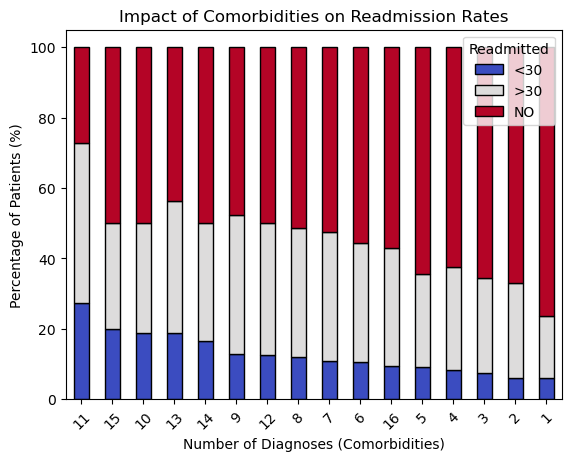

In [128]:
# Group data by 'number_diagnoses' and 'readmitted', then find the percentage of each group
comorbidity_data = diabetic_df1.groupby('number_diagnoses')['readmitted'].value_counts(normalize=True).unstack() * 100

# Sort data by 30-day readmission rate in descending order to find groups that are most at risk
comorbidity_data = comorbidity_data.sort_values(by='<30', ascending=False)

# Plot a stacked bar chart for comobordities and readmission
plot_stacked_bar_grouped(comorbidity_data,
                 title='Impact of Comorbidities on Readmission Rates',
                 xlabel='Number of Diagnoses (Comorbidities)',
                 ylabel='Percentage of Patients (%)',
                 color_palette='coolwarm',
                 show_labels=False)

✅ **Insights:**
- *Short-term readmissions (<30 days) increase with higher comorbidities. This means that patients with more health issues or comorbidities are more prone to early complications after discharge from the hospital.*
- *Higher number of comorbidities is linked to higher readmission rates. Patients with 11 or more diagnoses have noticeably higher long-term (>30) and short-term (<30) readmission rates.*
- *Patients with fewer comorbidities (1-4) have the highest successful discharge rates*

## Correlation and Heatmap

### Correlation Matrix
This will be viewed using a heatmap. It will help us understand the variables with the strongest and weakest relationships.

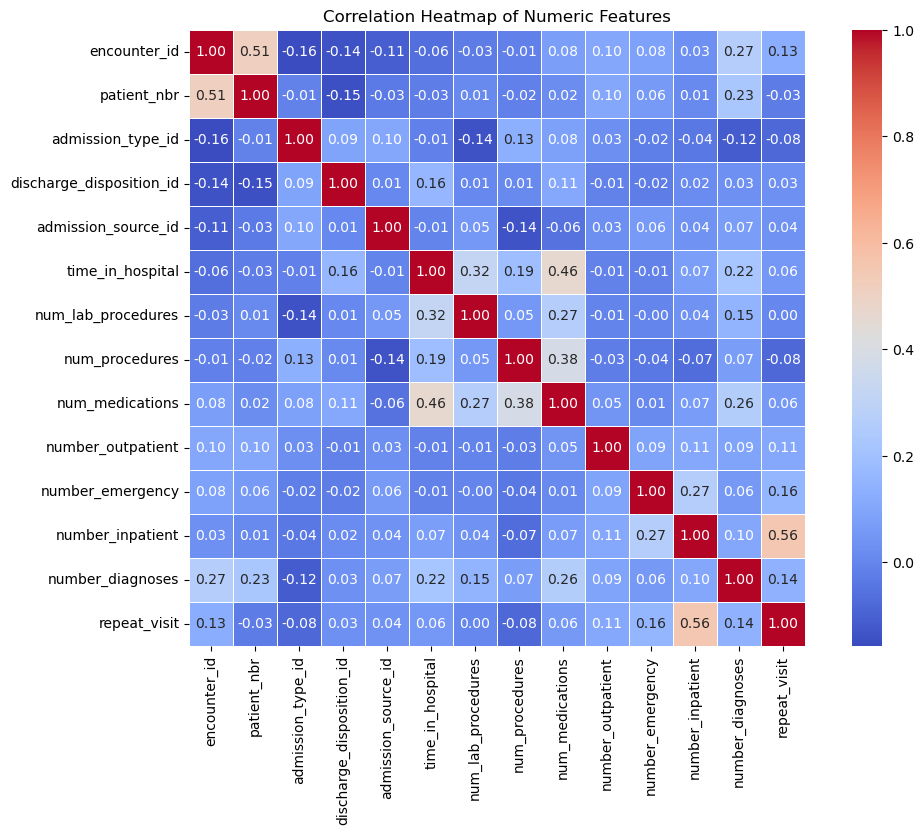

In [132]:
# Remove non-numeric columns from the original dataframe
numeric_df = diabetic_df1.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

✅ **Insights:**
- *Number of inpatient visits is moderately correlated with repeat visits (0.56), suggesting that patients who are frequently admitted as inpatients are more likely to have repeat hospital visits.*
- *Number of medications has a moderate correlation with time in hospital (0.46), suggesting that patients who are on more medications tend to have longer hospital stays. This highlights a need for better medication management to reduce hospital stay length.*

In [134]:
# Set correlation threshold so as to detect correlations that are moderate or high
threshold = 0.5

# Find out the highly correlated pairs
high_corr = np.where(np.abs(corr_matrix) > threshold)

# Create a list of high correlation pairs, but don't count in duplicates
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y]) 
                   for x, y in zip(*high_corr) if x != y and x < y]

# Display highly correlated pairs
high_corr_pairs

[('encounter_id', 'patient_nbr', 0.5134455589469251),
 ('number_inpatient', 'repeat_visit', 0.5568069244598384)]

## Segmenting Patients by Age Group, Race, and Diagnosis
The goal is to group patients by age, race, and primary diagnosis to identify vulnerable patient groups. Basically, this is to determine if specific combinations of age, race, and diagnosis are linked to higher readmission rates.

In [136]:
# Group by age, race, and diagnosis
age_race_diag = diabetic_df1.groupby(['age', 'race', 'diag_1'])['readmitted'].value_counts(normalize=True).unstack().fillna(0) * 100

# Filter out combinations with fewer than 30 cases to avoid noise
valid_groups = diabetic_df1.groupby(['age', 'race', 'diag_1']).size()
age_race_diag = age_race_diag.loc[valid_groups[valid_groups > 30].index]

# Sort by highest short-term readmission rates
age_race_diag = age_race_diag.sort_values(by='<30', ascending=False).head(10)

# Display the result
age_race_diag

readmitted                          <30        >30         NO
age   race            diag_1                                 
60-70 Caucasian       V58     48.214286  28.571429  23.214286
50-60 Caucasian       V58     41.176471  25.490196  33.333333
40-50 AfricanAmerican 250.6   32.608696  40.217391  27.173913
20-30 AfricanAmerican 250.6   32.558140  55.813953  11.627907
      Caucasian       577     32.432432  48.648649  18.918919
                      250.13  29.032258  34.838710  36.129032
40-50 AfricanAmerican 250.7   28.947368  36.842105  34.210526
70-80 Caucasian       571     26.666667  31.111111  42.222222
                      443     26.470588  41.176471  32.352941
40-50 Caucasian       250.82  26.315789  34.210526  39.473684

✅ **Insights:**
- *Post-treatment care (V58) shows the highest 30-day readmissions among Caucasian patients aged 60–70 (48.2%) and 50–60 (41.2%), suggesting a need for better follow-up care among these groups.*
- *African American patients with diabetes (250.6) have high >30 day readmissions, especially in the 20–30 age group (55.8%), indicating complex chronic care issues*
- *Digestive system issues (577) among Caucasian patients have high >30 day readmissions (48.6%), pointing to recovery challenges related to digestive disorders after discharge.*
- *Chronic liver disease (571) among older Caucasian patients shows moderate short-term readmissions (26.7%) but lower long-term readmissions (31.1%).*

## 🧠 What Does this Mean in Business & Operations?

⭐ **Patient Demographics**
- *Older patients (60–80 years) have the highest 30-day readmission rates. Therefore, targeted follow-up care for older adults could reduce readmissions by 10–15%. Implementing improve follow-up care after hospital discharge for this group could free up hospital space & beds and avoid financial penalties associed with <30 days readmission rates.*
- *Female patients are slightly more likely to be readmitted within 30 days than male patients, but the difference is small. More research and analysis could help find out if hormones or treatment differences play a role in this trend.*
- *Caucasian and African American patients have the highest readmission rates. Improving access to outpatient care and providing health education tailored to different cultural needs could help close this gap and improve recovery.*

⭐ **Hospital Stay and Medical Procedures**
- *Most patients stay in the hospital for 2–3 days, which shows that short-term care usually works well for stable patients. However, patients staying over 10 days have readmission rate of over 20%, suggesting that better discharge planning could help with complex cases.*
- *Most patients have 40–50 lab tests during their stay, but some have a lot more. This could mean they are being over-tested or that the patient's health issues are really complex. Simplifying testing could save costs without lowering care quality.*
- *Reducing average length of stay by 1 day for low-risk patients could increase hospital capacity by 5–7% and reduce running costs.*

⭐ **Medication Use and Impact**
- *Patients not on insulin had the highest successful discharge rate (55.4%) and the lowest 30-day readmission rate (10.2%), suggesting that some patients might be overprescribed insulin or may not even need the medication. Adjusting treatment protocols for low-risk patients could improve recovery.*
- *Increased metformin dose was linked to the highest successful discharge rate (59.1%) and the lowest 30-day readmission rate (8.3%). Keeping metformin use stable could help improve recovery and reduce costs.*
- *Patients on glyburide and glipizide showed mixed outcomes. Steady dose improved long-term recovery, but dose changes increased the risk of readmission. More consistent prescription patterns could improve outcomes.*
- *Improving medication plans based on these findings could cut readmissions by 5–10% and lower medication costs by up to 8%.*

⭐ **Combination Therapies**
- *Insulin + Metformin resulted in the lowest 30-day readmission rate (10.3%) and the highest successful discharge rate (55.8%). If more patients are treated with this combination, it could lead to better recovery rates and reduced readmissions within 30 days.*
- *Metformin + Glyburide also worked well, showing that combination therapies might help with better long-term recovery. Shifting towards these combinations could help patients stay stable and cut costs from 30-day readmissions.*
- *Promoting evidence-based combination therapy strategies could reduce medication-related readmissions by 10–12% and improve how treatments are managed.*

⭐ **Diagnoses and Specialty Analysis**
- *Heart failure is the leading cause of 30-day readmissions. Providing cardiac care after discharge could reduce 30-day readmissions for this group by 12–15% and lower associated costs.*
- *Pneumonia and respiratory issues also lead to early readmissions. Adding follow-up respiratory therapy and at-home oxygen monitoring could reduce respiratory-related readmissions by 10%.*
- *Patients treated under cardiology and pulmonology have the highest readmission rates, suggesting that more follow-ups with specialists and better outpatient care could help improve recovery.*
- *Improving specialty-specific care plans could lower readmission rates for these diagnoses by 10–15%, making the hospital run more smoothly and improving patient recovery.*

⭐ **Repeat Visits and Readmission Risk**
- *First-time patients have a higher chance of successful discharge (59.3%), showing that initial care is effective for stable cases.*
- *Repeat patients are nearly twice as likely to be readmitted within 30 days (17.2% vs. 9.0%) as first-time patients. Creating special care plans for these high-frequency patients could cut this risk by 10–12% and free up more beds.*
- *Setting up targeted care for repeat patients could help improve bed availability and reduce the cost of treating complex cases.*

⭐ **Comorbidities and Readmission Risk**
- *Patients with more than 11 comorbidities are almost twice as likely to be readmitted within 30 days. Developing a specialized care program for these patients could reduce readmissions by 15% and improve long-term outcomes.*
- *Improving care for comorbid patients could save up to $1.5M a year in readmission costs.*

⭐ **Correlation Between Key Variables**
- *Number of medications and length of stay are moderately correlated (0.46), meaning that patients on more medications tend to stay in the hospital longer. Optimising medication plans could shorten patients' hospital stays and cut costs.*
- *Number of inpatient visits is moderately correlated with repeat visits (0.56), showing that patients who are often admitted may need better care after discharge. Better follow-ups and telehealth could help reduce repeat visits within 30 days.*
- *Improving medication consistency and follow-up care could reduce hospital bed usage by 5–7% and increase revenue from planned treatments.*

⭐ **Patient Segmentation**
- *Caucasian patients aged 60–70 with post-treatment care (V58) had the highest 30-day readmission rates (48.2%), suggesting that better discharge planning and strong support after discharge could reduce this rate.*
- *African American patients aged 20–30 with diabetes (ICD-9 code 250.6) had high readmissions after 30 days, showing that they may need better long-term care and education.*
- *Digestive issues (ICD-9 code 577) among Caucasian patients contributed to high readmissions after 30 days — better diet and lifestyle support could help improve recovery*
- *Better understanding of patient needs (their health conditions, treatment history, and care needs) and more personalised care could cut 30-day readmissions for high-risk patients by 10–15%.*

## 🤔 What Can Be Done?

- ➡️*Enhance follow-up care for older patients and repeat patients. Reducing 30-day readmissions by 10–15% could free up more beds and lower financial penalties.*
- ➡️*Focus on heart failure and respiratory care. Better targeted care after discharge could reduce 30-day readmissions for patients with these conditions by 12–15%.*
- ➡️*Optimise medication strategies. Using metformin and insulin together could lower medication-related readmissions by 10–12%.*
- ➡️*Develop personalised care plans for comorbid and repeat patients. Reducing readmissions by 15% for this group could save up to $1.5M annually.*
- ➡️*Invest more in combination therapies and outpatient care. Regular check-ups could reduce overall readmissions and improve patient recovery.*
- ➡️*Improve care pathways for high-risk groups. Better coordination among cardiology, pulmonology, and endocrinology could reduce specialty-related readmissions by 10–15%.*